<a href="https://colab.research.google.com/github/yms07/My-Project1/blob/main/RansomwareDetection_FPE_withoutlabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 🔹 Step 2: ফোল্ডার পাথ সেট করো
zip_folder = "/content/drive/MyDrive/GovDocs1_Thesis"
plaintext_dir = "/content/plaintext_folder"
os.makedirs(plaintext_dir, exist_ok=True)



In [ ]:
# 🔹 Step 3: কোন ফাইল টাইপ নিতে চাও
selected_types = [".csv", ".txt", ".doc", ".docx", ".ppt", ".pptx", ".xls", ".xlsx", ".html", ".c", ".cpp", ".jpg", ".pdf", ".zip"]

In [ ]:
# 🔹 Step 4: সব zip ফাইল extract করে দরকারি ফাইল কপি করো
for zip_file in sorted(os.listdir(zip_folder)):
    if zip_file.endswith(".zip"):
        zip_path = os.path.join(zip_folder, zip_file)
        extract_path = "/content/temp_extracted"
        os.makedirs(extract_path, exist_ok=True)

        print(f"📦 Extracting {zip_file}...")

        try:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_path)

            count = 0
            for root, _, files in os.walk(extract_path):  # ✅ Recursively walk all folders
                for file in files:
                    ext = os.path.splitext(file)[1].lower()
                    if ext in selected_types:
                        src_path = os.path.join(root, file)
                        dst_path = os.path.join(plaintext_dir, file)
                        if not os.path.exists(dst_path):
                            shutil.copy(src_path, dst_path)
                            count += 1

            print(f"✅ Copied {count} valid files from {zip_file}")
            shutil.rmtree(extract_path)

        except Exception as e:
            print(f"❌ Error extracting {zip_file}: {e}")

📦 Extracting 000.zip...
✅ Copied 896 valid files from 000.zip
📦 Extracting 001.zip...
✅ Copied 916 valid files from 001.zip
📦 Extracting 002.zip...
✅ Copied 936 valid files from 002.zip
📦 Extracting 003.zip...
✅ Copied 954 valid files from 003.zip
📦 Extracting 004.zip...
✅ Copied 923 valid files from 004.zip
📦 Extracting 005.zip...
✅ Copied 939 valid files from 005.zip
📦 Extracting 006.zip...
✅ Copied 896 valid files from 006.zip
📦 Extracting 007.zip...
✅ Copied 895 valid files from 007.zip
📦 Extracting 008.zip...
✅ Copied 914 valid files from 008.zip
📦 Extracting 009.zip...
✅ Copied 922 valid files from 009.zip
📦 Extracting 010.zip...
✅ Copied 928 valid files from 010.zip
📦 Extracting 011.zip...
✅ Copied 925 valid files from 011.zip
📦 Extracting 012.zip...
✅ Copied 929 valid files from 012.zip
📦 Extracting 013.zip...
✅ Copied 885 valid files from 013.zip
📦 Extracting 014.zip...
✅ Copied 931 valid files from 014.zip
📦 Extracting 015.zip...
✅ Copied 922 valid files from 015.zip
📦 Extrac

In [ ]:
print("📁 Total files in plaintext_folder:", len(os.listdir(plaintext_dir)))

📁 Total files in plaintext_folder: 45469


In [ ]:
import os
import math
import pandas as pd

folder = "/content/plaintext_folder"

file_type_map = {
    ".csv": 1, ".txt": 2, ".doc": 3, ".docx": 4, ".ppt": 5, ".pptx": 6,
    ".xls": 7, ".xlsx": 8, ".html": 9, ".c": 10, ".cpp": 11, ".jpg": 12,
    ".pdf": 13, ".zip": 14
}

def calculate_entropy(filepath):
    try:
        with open(filepath, 'rb') as f:
            data = f.read()
        if len(data) == 0:
            return 0
        freq = [0] * 256
        for byte in data:
            freq[byte] += 1
        entropy = 0
        for f in freq:
            if f > 0:
                p = f / len(data)
                entropy -= p * math.log2(p)
        return round(entropy, 4)
    except:
        return 0

dataset = []
for file in os.listdir(folder):
    path = os.path.join(folder, file)
    ext = os.path.splitext(file)[1].lower()
    entropy = calculate_entropy(path)
    try:
        size = os.path.getsize(path) / 1_000_000  # MB
        mtime = os.path.getmtime(path)
        atime = os.path.getatime(path)
        ctime = os.path.getctime(path)
        ftype = file_type_map.get(ext, 0)
        label = 1  # plaintext
        dataset.append([entropy, size, mtime, atime, ctime, ftype])
    except:
        continue

df = pd.DataFrame(dataset, columns=["entropy", "size", "mtime", "atime", "ctime", "type"])
csv_path = "/content/govdocs1_plaintext_dataset.csv"
df.to_csv(csv_path, index=False)

print(f"✅ Dataset created with {len(df)} records.")
df.head()

✅ Dataset created with 45469 records.


,entropy,size,mtime,atime,ctime,type
0,4.6874,0.084839,1.750880e+09,1.750880e+09,1.750880e+09,9
1,7.5599,0.388096,1.750879e+09,1.750880e+09,1.750879e+09,5
2,4.3726,0.281434,1.750879e+09,1.750879e+09,1.750879e+09,2
3,7.9755,0.071858,1.750880e+09,1.750880e+09,1.750880e+09,12
4,3.7091,0.529011,1.750879e+09,1.750880e+09,1.750879e+09,2


In [ ]:
import shutil
shutil.copy(csv_path, "/content/drive/MyDrive/GovDocs1_Thesis/govdocs1_plaintext_dataset.csv")

'/content/drive/MyDrive/GovDocs1_Thesis/govdocs1_plaintext_dataset.csv'

In [ ]:
import os
import shutil

plaintext_dir = "/content/plaintext_folder"
ciphertext_dir = "/content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder"

os.makedirs(ciphertext_dir, exist_ok=True)

# সব plaintext ফাইলকে Drive-এ কপি করো
for file in os.listdir(plaintext_dir):
    src = os.path.join(plaintext_dir, file)
    dst = os.path.join(ciphertext_dir, file)
    if not os.path.exists(dst):
        shutil.copy(src, dst)

print(f"✅ Total copied files to ciphertext_folder: {len(os.listdir(ciphertext_dir))}")

✅ Total copied files to ciphertext_folder: 45469


In [ ]:
!pip install pyffx

In [ ]:
import os
import pyffx
import string
import time


ciphertext_dir = "/content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder"
safe_types = [".txt", ".csv", ".html", ".c", ".cpp"]
processed = 0
max_files = 3000  # 🔹 আপনি চাইলে এটা 500, 1000 বা 3000 করতে পারেন

# ✅ byte-টাইপ key দরকার pyffx এর জন্য
key = b"my_secret_key"
alphabet = string.printable

start_time = time.time()

def fpe_encrypt_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            data = f.read()

        # খুব ছোট বা খালি ডেটা skip
        if not data.strip() or len(data) < 10:
            return

        fpe = pyffx.String(key, alphabet=alphabet, length=len(data))
        encrypted_data = fpe.encrypt(data)

        with open(file_path, 'w', encoding='utf-8', errors='ignore') as f:
            f.write(encrypted_data)

    except Exception as e:
        print(f"❌ Encryption error: {file_path} | {e}")

# 🔁 Encrypt শুধু নির্দিষ্ট safe টাইপের এবং সীমিত সংখ্যক ফাইল
for file in os.listdir(ciphertext_dir):
    ext = os.path.splitext(file)[1].lower()
    if ext in safe_types:
        path = os.path.join(ciphertext_dir, file)
        fpe_encrypt_file(path)
        processed += 1
        if processed % 100 == 0:
            print(f"✅ Encrypted {processed} files...")
        if processed >= max_files:
            break

end_time = time.time()
elapsed = end_time - start_time
print(f"\n🔐 Done! Total {processed} files encrypted in {elapsed/60:.2f} minutes.")


❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/032268.html | non-alphabet character: '®'
❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/022248.html | non-alphabet character: '\x1b'
❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/030362.html | non-alphabet character: '–'
❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/046089.html | non-alphabet character: '\xa0'
❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/022144.html | non-alphabet character: '–'
❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/033825.html | non-alphabet character: '“'
❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/022873.html | non-alphabet character: '»'
❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/039870.txt | non-alphabet character: '\x02'
✅ Encrypted 100 files...
❌ Encryption er

In [ ]:
import math
import pandas as pd

file_type_map = {
    ".csv": 1, ".txt": 2, ".doc": 3, ".docx": 4, ".ppt": 5, ".pptx": 6,
    ".xls": 7, ".xlsx": 8, ".html": 9, ".c": 10, ".cpp": 11, ".jpg": 12,
    ".pdf": 13, ".zip": 14
}

def calculate_entropy(filepath):
    try:
        with open(filepath, 'rb') as f:
            data = f.read()
        if len(data) == 0:
            return 0
        freq = [0] * 256
        for byte in data:
            freq[byte] += 1
        entropy = 0
        for f in freq:
            if f > 0:
                p = f / len(data)
                entropy -= p * math.log2(p)
        return round(entropy, 4)
    except:
        return 0

# Extract from ciphertext folder
dataset = []
for file in os.listdir(ciphertext_dir):
    path = os.path.join(ciphertext_dir, file)
    ext = os.path.splitext(file)[1].lower()
    entropy = calculate_entropy(path)
    try:
        size = os.path.getsize(path) / 1_000_000  # MB
        mtime = os.path.getmtime(path)
        atime = os.path.getatime(path)
        ctime = os.path.getctime(path)
        ftype = file_type_map.get(ext, 0)
        label = 0  # ciphertext
        dataset.append([entropy, size, mtime, atime, ctime, ftype])
    except:
        continue

df2 = pd.DataFrame(dataset, columns=["entropy", "size", "mtime", "atime", "ctime", "type"])
csv2_path = "/content/govdocs1_ciphertext_dataset.csv"
df2.to_csv(csv2_path, index=False)

print(f"✅ Ciphertext dataset created with {len(df2)} records.")
df2.head()

✅ Ciphertext dataset created with 45469 records.


,entropy,size,mtime,atime,ctime,type
0,6.6430,0.084221,1.750888e+09,1.750888e+09,1.750891e+09,9
1,7.5599,0.388096,1.750882e+09,1.750882e+09,1.750891e+09,5
2,6.6436,0.281408,1.750888e+09,1.750888e+09,1.750891e+09,2
3,7.9755,0.071858,1.750882e+09,1.750882e+09,1.750891e+09,12
4,6.6437,0.528953,1.750888e+09,1.750888e+09,1.750891e+09,2


In [ ]:
shutil.copy(csv2_path, "/content/drive/MyDrive/GovDocs1_Thesis/govdocs1_ciphertext_dataset.csv")

'/content/drive/MyDrive/GovDocs1_Thesis/govdocs1_ciphertext_dataset.csv'

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

# দুইটি dataset লোড করো
df1 = pd.read_csv("/content/govdocs1_plaintext_dataset.csv")
df2 = pd.read_csv("/content/govdocs1_ciphertext_dataset.csv")

# Merge করো
final_df = pd.concat([df1, df2], ignore_index=True)

# Shuffle করে মিশাও
final_df = shuffle(final_df).reset_index(drop=True)

# Final CSV ফাইল তৈরি
final_csv_path = "/content/final_dataset.csv"
final_df.to_csv(final_csv_path, index=False)

print(f"✅ Final dataset created with {len(final_df)} total records.")
final_df.head()

✅ Final dataset created with 90938 total records.


,entropy,size,mtime,atime,ctime,type
0,4.9022,0.038693,1.750879e+09,1.750879e+09,1.750879e+09,9
1,5.1722,0.036793,1.750882e+09,1.750882e+09,1.750899e+09,9
2,3.6188,0.082867,1.750879e+09,1.750880e+09,1.750879e+09,2
3,5.4047,0.050867,1.750882e+09,1.750882e+09,1.750895e+09,2
4,5.1256,0.033957,1.750882e+09,1.750882e+09,1.750900e+09,9


In [ ]:
import shutil
shutil.copy(final_csv_path, "/content/drive/MyDrive/GovDocs1_Thesis/final_dataset.csv")

'/content/drive/MyDrive/GovDocs1_Thesis/final_dataset.csv'

/tmp/ipython-input-17-4060327690.py:33: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


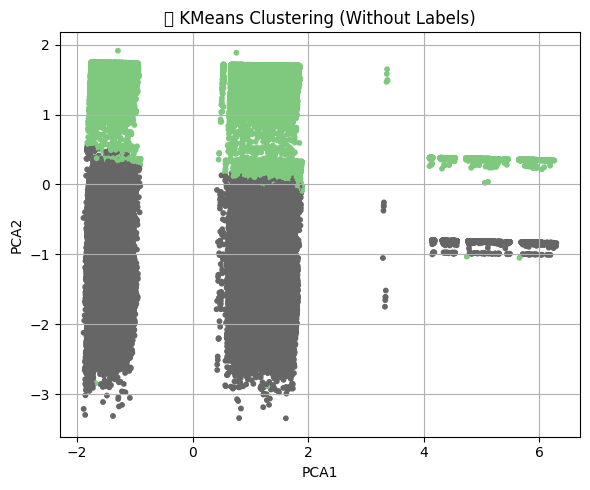

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ✅ Dataset লোড (label বাদ দিয়ে)
df = pd.read_csv("/content/final_dataset.csv")
if "label" in df.columns:
    df = df.drop(columns=["label"])

# ✅ Feature নির্ধারণ
X = df[["entropy", "size", "mtime", "atime", "ctime", "type"]]

# ✅ Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# ✅ Clustering Visualization with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="Accent", s=10)
plt.title("🔍 KMeans Clustering (Without Labels)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.tight_layout()
plt.show()